# Perceptron Implementation

In this notebook, we will be implementing the perceptron algorithm and testing it on our Auto-MPG dataset. 

As seen in the below picture, the perceptron is a single neuron that takes in multiple features as inputs and eventually decide to activate or not activate. The algorithm will either return a +1 or -1, if the final prediction passes a certain cutoff. 

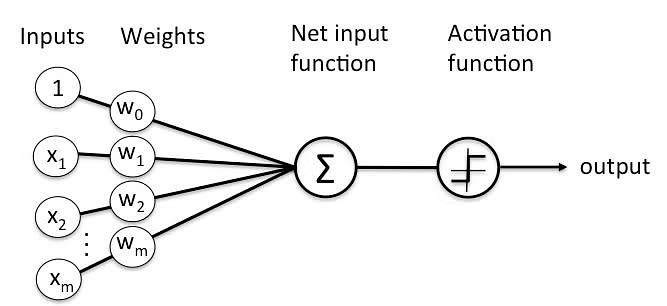


Pre-Activation Function: $z = w_1 x_1 + w_2 x_2 + ... w_m x_m + w_0$

Post-Activation Function: $a = \phi (z)$

Activation Function: $a$ = $1$ if $z > 0$, $-1$ if $z < 0$

### Advantages:
* Simplicity: Perceptrons are straightforward and easy to understand. They form the basis of more complex neural networks and are often used as building blocks in deep learning architectures.

* Efficiency: Perceptrons are computationally efficient, making them suitable for applications with limited computational resources.

* Linear Separability: Perceptrons work well when the data is linearly separable, meaning the classes can be separated by a single straight line or hyperplane.

### Disadvantages:
* Limited Representation: Perceptrons are limited in their ability to represent complex patterns or relationships in data. They can only learn linear decision boundaries, which restricts their applicability to tasks that are not linearly separable.

* Noisy Data: Perceptrons are sensitive to noisy data and outliers, as they can significantly affect the learning process and the resulting decision boundaries.

* Binary Output: Perceptrons produce binary output (0 or 1), which may not be suitable for tasks that require probabilistic predictions or multi-class classification.

### Implementation:

First, we will load in the dataset. We must convert our dataset to fit our classification task. We will predict whether a vehicle has low or high MPG. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

auto = pd.read_csv("/Users/kritinshanmugam/Downloads/auto-mpg.csv")
auto = auto[auto['horsepower'] != '?']

X = auto.drop(['car name', 'mpg'], axis=1)
X = X.astype('float64')

X = (X - X.mean())/X.std()
X = X[['horsepower', 'weight']].astype('float64')
y = auto['mpg'].astype('float64')

y = np.where(auto['mpg'] < 23, -1, 1)

X = X.values


Now, we can actually implement our perceptron algorithm through a python class. This class will hold a scaling value, epochs, weights (including bias), and training errors. It will also include methods for training, inputting data, and making predictions.

In [2]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Now, we can create an instance of the Perceptron and try it on our dataset. 

In [3]:

# Create instance of Perceptron class with 10k epochs
Percept = Perceptron(eta=0.2, epochs = 10_000)

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
# Train the Perceptron on the training dataset
Percept.train(x_train, y_train)

# Obtain the predictions
y_predictions = Percept.predict(x_test)

booleans = ((y_test == y_predictions))

print("Number of false predictions: ", np.sum(booleans == False))


Number of false predictions:  11


Our perceptron returned a pretty low number of false predictions! We can plot the model's decision boundary to analyze how it decided a datapoint's classification. 

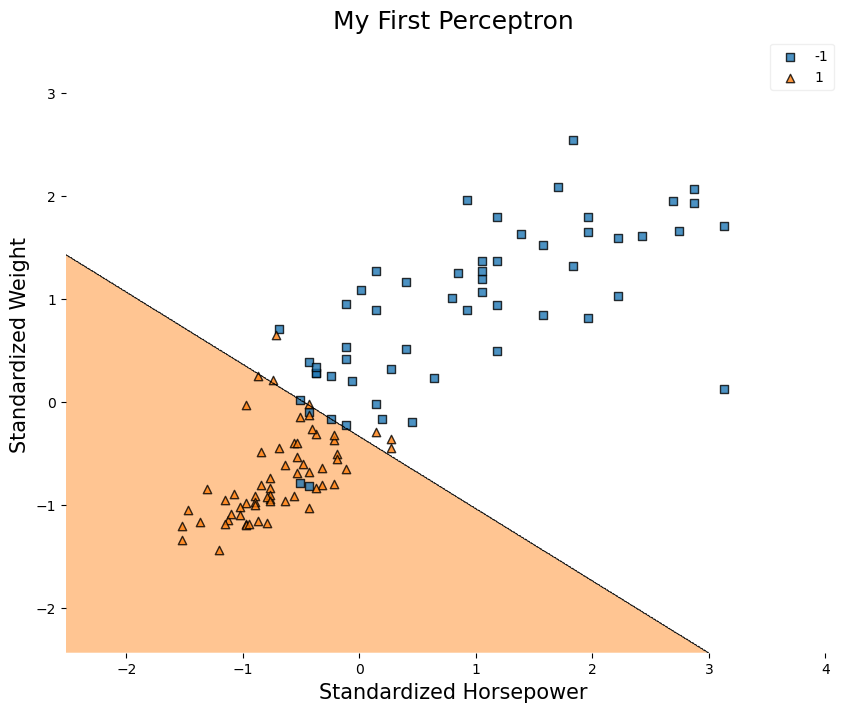

In [4]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(x_test, y_test, clf = Percept)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("Standardized Horsepower", fontsize = 15)
plt.ylabel("Standardized Weight", fontsize = 15)
plt.show()

In this plot, we can see that our Perceptron model chose a line to best separate the datapoints. There are a few outliers with a -1 classification in the orange-shaded area, but most low-MPG vehicles our outside that area. Our simple machine learning model was able to make an accurate decision boundary. 

We can also visualize the error of our Perceptron during the training epochs. The error should generally decrease by the end of our training iterations. 

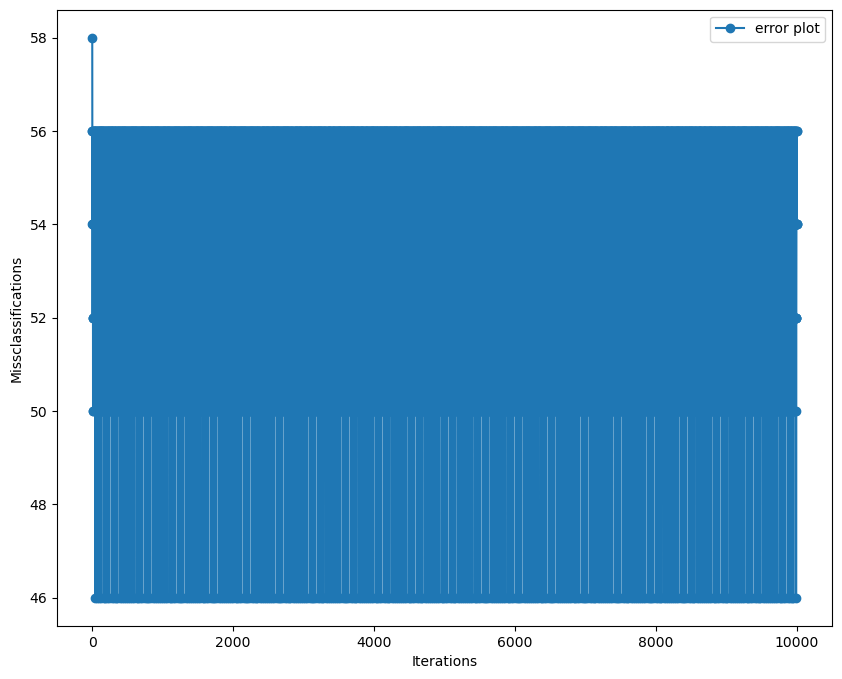

In [5]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(Percept.errors_)+1), Percept.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

In our error plot, it seems like the error shot up and down after each iteration. The important thing to notice is that the error was low at the 10,000th iteration. This means our model learned the weights well and was able to generate accurate predictions. 

## Conclusion



In this notebook, we were successfuly able to implement the simple Perceptron model on our Auto-MPG dataset. The model decided on an accurate linear boundary to guide its classification task. We can move forward to slightly more complex models, but it is important to note the simplicity and accuracy of the Perceptron. 